<a href="https://colab.research.google.com/github/hdev90/ARIMA/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=75bfc2e92c1f7d9b5886e51ac2c3ba98ad19a86c6258a4f6510cee30c8352892
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


[*********************100%***********************]  1 of 1 completed


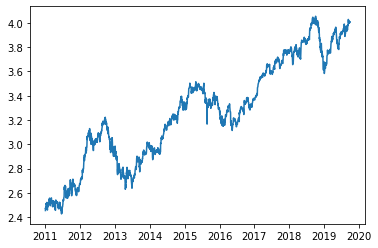

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


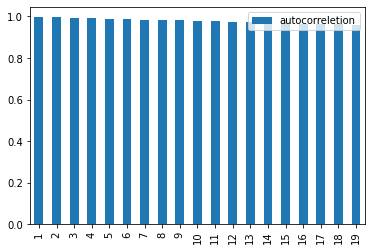

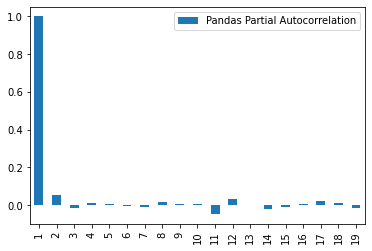

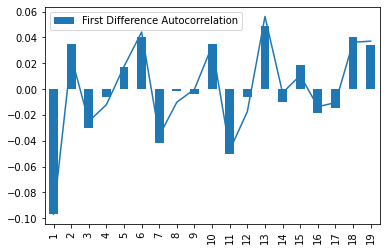

4.858997073316369
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1539
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3982.972
Method:                           css   S.D. of innovations              0.018
Date:                Sun, 04 Oct 2020   AIC                          -7961.945
Time:                        19:01:16   BIC                          -7951.267
Sample:                             1   HQIC                         -7957.972
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.477      0.140      -0.000       0.002


In [ ]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
import yfinance as yf

data = yf.download("AAPL", start="2011-01-01", end="2019-09-30")
price=np.log(data['Open'])
X=price.values
train=X[:1540]
test=X[1540:]
#To show that data is stationary
lnprice=np.log(data['Open'])
lnprice
plt.plot(lnprice)
plt.show()

acf_1 =  acf(lnprice)[1:20]
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['autocorreletion']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()

pacf_1 = pacf(lnprice)[1:20]
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show

lnClose_diff=lnprice-lnprice.shift()
diff=lnClose_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

model_arima=ARIMA(train,order=(0,1,0))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.forecast(steps=len(X)-1540)[0]
predictions=np.exp(predictions)
test=np.exp(test)
rmse=math.sqrt(mean_squared_error(predictions,test))
print(rmse)
print(model_arima_fit.summary())